This project is based on the case study of a telecommunication company, which is facing a customer churn issue. The project aims at understanding the pattern of the data and predicting customers who are going to churn based on multiple variables to help the company in retaining their existing customers.

#### SkillsUsed : XGBoost, GridSearchCV, EDA

In [1]:
#Importing relevant libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
#Reading the dataset.

df1 = pd.read_csv('C:\Telecom\TelcomCustomer-Churn_1.csv')

In [3]:
#Reading the dataset.

df2 = pd.read_csv('C:\Telecom\TelcomCustomer-Churn_2.csv')

In [4]:
#Merging the dataset on common column.

df = pd.merge(df1, df2, on="customerID")

In [5]:
#Here we are going to verify if all the columns are incorporated in new dataframe.
#We add the no. of columns of merged dataframes(df1,df2) and subtract common column(customerID)
#If it equals the new dataframe's(df) no. of columns, then all the columns are incorporated or else not.

if(df.shape[1]==(df1.shape[1]+df2.shape[1]-1)):
  print("All columns from the merged dataframes are incorporated in the new dataframe")
else:
  print("All columns from the merged dataframes are not incorporated in the new dataframe")

All columns from the merged dataframes are incorporated in the new dataframe


In [6]:
#Analyzing the values of all the features.

print(df["gender"].value_counts())
print(df["SeniorCitizen"].value_counts())
print(df["Partner"].value_counts())
print(df["Dependents"].value_counts())
print(df["tenure"].value_counts())
print(df["PhoneService"].value_counts())
print(df["MultipleLines"].value_counts())
print(df["InternetService"].value_counts())
print(df["OnlineSecurity"].value_counts())
print(df["OnlineBackup"].value_counts())
print(df["DeviceProtection"].value_counts())
print(df["TechSupport"].value_counts())
print(df["StreamingTV"].value_counts())
print(df["StreamingMovies"].value_counts())
print(df["Contract"].value_counts())
print(df["PaperlessBilling"].value_counts())
print(df["PaymentMethod"].value_counts())
print(df["MonthlyCharges"].value_counts())
print(df["TotalCharges"].value_counts())
print(df["Churn"].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

In [7]:
#We can adjust the values of SeniorCitizen column to Yes and No, instead of 1 and 0 for better representation.
#Replacing 1 with Yes and 0 with No.

df["SeniorCitizen"].replace(1,"Yes",inplace=True)
df["SeniorCitizen"].replace(0,"No",inplace=True)

In [8]:
#In tenure column we have 0 values. Considering all the values in years, 0 year does not make much of a sense.
#We will consider 0 as 1 year as that is the most close value of year from 0. Imputing 1 for all 0's in tenure column.

df["tenure"].replace(0,1,inplace=True)

In [9]:
#There are two columns which have continous values, MonthlyCharges and TotalCharges.
#MonthlyCharges is default float, so no need to change the same. We have changed the TotalCharges to float with errors = 'coerce', which will
#transform non numeric values to NaN

df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [10]:
#Filling the NaN values with value "1" as 1 can be the minimum in Total Charges.

df['TotalCharges']=df['TotalCharges'].fillna(1)

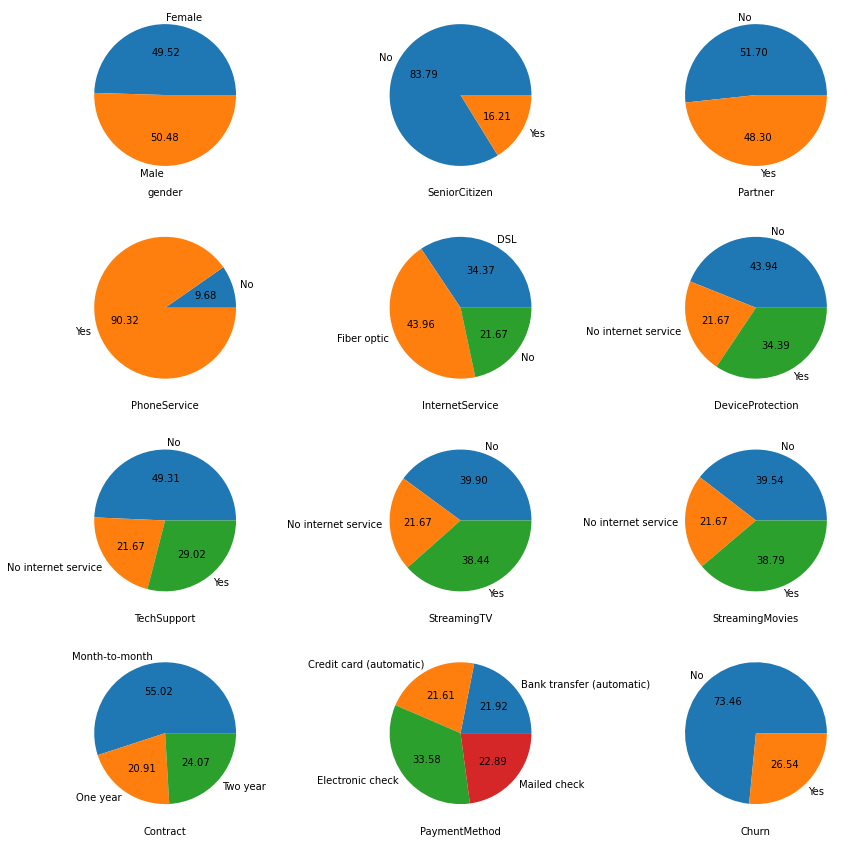

In [11]:
#We have chosen only the relevant columns and converted to category for creating a pie chart.

df["gender"]=df.gender.astype('category')
df["SeniorCitizen"]=df.SeniorCitizen.astype('category')
df["Partner"]=df.Partner.astype('category')
df["Contract"]=df.Contract.astype('category')
df["PaymentMethod"]=df.PaymentMethod.astype('category')
df["PhoneService"]=df.PhoneService.astype('category')
df["InternetService"]=df.InternetService.astype('category')
df["TechSupport"]=df.TechSupport.astype('category')
df["StreamingTV"]=df.StreamingTV.astype('category')
df["StreamingMovies"]=df.StreamingMovies.astype('category')
df["DeviceProtection"]=df.DeviceProtection.astype('category')
df["Churn"]=df.Churn.astype('category')


'''We are defining a function pie which takes a dataframe and returns pie charts for categorical columns.
We ran a loop for dataframe columns and if there dtypes is category, we have plotted a graph for those columns.

We have taken index variable for subplot function and incremented the same in loop.
We are aware of the total no. of columns, we have taken the relevant values in subplot.

We used autopct for percentage in pie chart.
We have adjusted the figsize according to the visibilty of charts.
'''

plt.figure(figsize=(15,15))
def pie(x):
  index=0
  for i in x.columns:
    if x[i].dtypes=='category':
      index=index+1
      axes = plt.subplot(4,3,index)
      x.groupby(i).size().plot(kind='pie',autopct="%.2f",ax=axes)
      axes.set_xlabel(i)
      axes.set_ylabel("")

pie(df)

In [12]:
#Insights.

print("Demographic Insights : \n\nWe have approximately equal no. of Males and Females customers.\nOur customer base is mostly of mid-age or young adults.\nWe have approximately half of the customers who are married and half of the customers are single.\n\n")
print("Services Insights : \n\nWe have 90% of our customers who use Phone Service.\nMajority of the customers prefer FiberOptic for Internet Services.\nMajority of the people do not go for Device Protection or Tech Support.\nWe have close to 40% of people who StreamTV or StreamMovies\n\n")
print("Customer Account Insights : \n\nMore than 50% of our customers prefer Month-to-Month contract.\nMajority of the people prefer Electronic check as their Payment Method followed by Mailed Check\n\n")
print("Churn Insights : \n\nWe have seen majority of the people stay with our services last month and only 26% Churn is observed.")

Demographic Insights : 

We have approximately equal no. of Males and Females customers.
Our customer base is mostly of mid-age or young adults.
We have approximately half of the customers who are married and half of the customers are single.


Services Insights : 

We have 90% of our customers who use Phone Service.
Majority of the customers prefer FiberOptic for Internet Services.
Majority of the people do not go for Device Protection or Tech Support.
We have close to 40% of people who StreamTV or StreamMovies


Customer Account Insights : 

More than 50% of our customers prefer Month-to-Month contract.
Majority of the people prefer Electronic check as their Payment Method followed by Mailed Check


Churn Insights : 

We have seen majority of the people stay with our services last month and only 26% Churn is observed.


In [13]:
#Implementing OneHotEncoding.

onehotcols=["gender","SeniorCitizen","Partner","Dependents","PhoneService","PaperlessBilling","Contract","PaymentMethod","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
df = pd.get_dummies(df, columns=onehotcols)

In [14]:
#Splitting the data.

X = df.drop(["Churn","customerID"],axis=1)
Y = df["Churn"]

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=1)

In [15]:
#Here we are doing Normalization which is a process of rescaling the numeric columns to standard scale[0,1].
#We subtract the minimum value of the column and divide by range(max-min).

#Creating a dataframe and assigning the values from original dataframe.

normalized_dataframe = pd.DataFrame()
normalized_dataframe["tenure"] = df["tenure"]
normalized_dataframe['MonthlyCharges'] = df["MonthlyCharges"]
normalized_dataframe["TotalCharges"] = df["TotalCharges"]

for x in normalized_dataframe.columns:
  normalized_dataframe[x] = (normalized_dataframe[x]-normalized_dataframe[x].min()) / (normalized_dataframe[x].max()-normalized_dataframe[x].min())

print("Here is the normalized data : \n\n",normalized_dataframe)


Here is the normalized data : 

         tenure  MonthlyCharges  TotalCharges
0     0.000000        0.115423      0.003322
1     0.464789        0.385075      0.217474
2     0.014085        0.354229      0.012339
3     0.619718        0.239303      0.211860
4     0.014085        0.521891      0.017348
...        ...             ...           ...
7038  0.323944        0.662189      0.229105
7039  1.000000        0.845274      0.847774
7040  0.140845        0.112935      0.039781
7041  0.042254        0.558706      0.035192
7042  0.915493        0.869652      0.788077

[7043 rows x 3 columns]


In [16]:
#Here we are doing standarization which will transform the data with mean of 0 and standard deviation of 1.
#We will use Z-Score method.

#Creating a dataframe and assigning the values from original dataframe.

standarized_dataframe = pd.DataFrame()
standarized_dataframe["tenure"] = df["tenure"]
standarized_dataframe['MonthlyCharges'] = df["MonthlyCharges"]
standarized_dataframe["TotalCharges"] = df["TotalCharges"]

for x in standarized_dataframe.columns:
  standarized_dataframe[x] = (standarized_dataframe[x]-standarized_dataframe[x].mean())/standarized_dataframe[x].std()

print("Standarized Data is : \n\n",standarized_dataframe)

Standarized Data is : 

         tenure  MonthlyCharges  TotalCharges
0    -1.277523       -1.160241     -0.992541
1     0.066265       -0.259611     -0.172153
2    -1.236802       -0.362635     -0.957999
3     0.514194       -0.746482     -0.193659
4    -1.236802        0.197351     -0.938809
...        ...             ...           ...
7038 -0.340944        0.665945     -0.127597
7039  1.613656        1.277443      2.242448
7040 -0.870315       -1.168549     -0.852873
7041 -1.155360        0.320315     -0.870453
7042  1.369331        1.358865      2.013754

[7043 rows x 3 columns]


In [17]:
#Importing the xgboost and XGBClassifier as we have labels in the target variables.
#Importing LabelEncoder as xgboost understands numeric values and it helps in encoding the labels to numeric values.
#Importing GridSearchCV for finding the best parameters for the model.
#Importing Classification Report.

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [18]:
#Splitting the data into X and Y

X = df.drop(["Churn","customerID"],axis=1)
Y = df["Churn"]

#Creating an object of LabelEncoder and using the same to transform the target variable Y.

Encoder = LabelEncoder()
Encoder = Encoder.fit(Y)
Encoder_Y = Encoder.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Encoder_Y, test_size=.20, random_state=1)

In [19]:
#Finding the best parameters using GridSearchCV.
#eta is used for learning rate. It gets multiplied with the residuals to reduce their weights.
#n_estimators is number of runs/trees xgboost tries to learn.
#gamma is used to take care of overfitting.
#max_depth is the maximum depth of the tree.
#min_child_weight is when you stop splitting once you reach a certain amount of purity in a node.

model = XGBClassifier()
params = {
    
    "eta" : [0.9,0.8],
    "max_depth" : [8,7],
    "gamma" : [1,0],
    "min_child_weight" : [1,2],
    "n_estimators" : [200,100,300]
}

#Here n_jobs is number of jobs to run in parallel.
#cv is number of cross validations for each selected set of hyperparameters.
#Training the model.

gd = GridSearchCV(model,params,n_jobs=4,cv=3)
gd.fit(X_train,Y_train)

print("The best parameters are : \n",gd.best_params_)

The best parameters are : 
 {'eta': 0.9, 'gamma': 1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}


In [20]:
#Evaluating the performance.
#For Training Data.

train_pred = gd.predict(X_train)
print("The Classification Report for Training Data is :\n",classification_report(Y_train,train_pred))

#For Testing Data.

test_pred = gd.predict(X_test)
print("The Classification Report for Test Data is :\n",classification_report(Y_test,test_pred))



The Classification Report for Training Data is :
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      4113
           1       0.92      0.87      0.89      1521

    accuracy                           0.94      5634
   macro avg       0.93      0.92      0.93      5634
weighted avg       0.94      0.94      0.94      5634

The Classification Report for Test Data is :
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1061
           1       0.57      0.59      0.58       348

    accuracy                           0.79      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.79      0.79      0.79      1409



In [21]:
#Insights.

print("We can see the accuracy in Training Data is 94% and Testing Data is 79%")
print("The model does not seem to do well in Test Data.")
print("We will try to tune the parameters to improve the performance.")

We can see the accuracy in Training Data is 94% and Testing Data is 79%
The model does not seem to do well in Test Data.
We will try to tune the parameters to improve the performance.


In [22]:
#Splitting the data into X and Y

X = df.drop(["Churn","customerID"],axis=1)
Y = df["Churn"]

#Creating an object of LabelEncoder and using the same to transform the target variable Y.

Encoder = LabelEncoder()
Encoder = Encoder.fit(Y)
Encoder_Y = Encoder.transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Encoder_Y, test_size=.20, random_state=1)

In [23]:
#Tuning the best parameters using GridSearchCV.
#eta is used for learning rate. It gets multiplied with the residuals to reduce their weights.
#n_estimators is number of runs/trees xgboost tries to learn.
#gamma is used to take care of overfitting.
#max_depth is the maximum depth of the tree.
#min_child_weight is when you stop splitting once you reach a certain amount of purity in a node.


model = XGBClassifier()
params = {
    
    "eta" : [0.01,0.2],
    "max_depth" : [3,4],
    "gamma" : [0,2],
    "min_child_weight" : [1,4],
    "n_estimators" : [200,500,300]
}

#Here n_jobs is number of jobs to run in parallel.
#cv is number of cross validations for each selected set of hyperparameters.
#Training the model.

gd = GridSearchCV(model,params,n_jobs=4,cv=4)
gd.fit(X_train,Y_train)

print("The best parameters are : \n",gd.best_params_)

The best parameters are : 
 {'eta': 0.01, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500}


In [24]:
#Parameter Tuning.

print("We have tuned the eta and max_depth values and reduced them to 0.01 and 4.")
print("We have tuned the gamma value by increasing it to 2.")
print("We have increased the cv value to 4")
print("These changes in parameters will help in improving the performance")

We have tuned the eta and max_depth values and reduced them to 0.01 and 4.
We have tuned the gamma value by increasing it to 2.
We have increased the cv value to 4
These changes in parameters will help in improving the performance


In [25]:
#Evaluating the performance.
#For Training Data.

train_pred = gd.predict(X_train)
print("The Classification Report for Training Data is :\n",classification_report(Y_train,train_pred))

#For Testing Data.

test_pred = gd.predict(X_test)
print("The Classification Report for Test Data is :\n",classification_report(Y_test,test_pred))


The Classification Report for Training Data is :
               precision    recall  f1-score   support

           0       0.85      0.91      0.88      4113
           1       0.71      0.57      0.63      1521

    accuracy                           0.82      5634
   macro avg       0.78      0.74      0.76      5634
weighted avg       0.81      0.82      0.81      5634

The Classification Report for Test Data is :
               precision    recall  f1-score   support

           0       0.86      0.89      0.88      1061
           1       0.63      0.57      0.60       348

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.81      0.81      0.81      1409



In [26]:
#Insights.

print("The accuracy in Training Data is 82% and Testing Data is 81%")
print("We have improved the performance of the model and the model behaves almost similar in both Training and Testing Data.")

The accuracy in Training Data is 82% and Testing Data is 81%
We have improved the performance of the model and the model behaves almost similar in both Training and Testing Data.
